# Customer Segmentation with Synthetic Data Using K-Means
In this notebook, we simulate an e-commerce customer base using synthetic data. Each customer is described by behavioral features such as purchase frequency, average basket size, and recency of last purchase. We use K-Means clustering to segment customers into distinct behavioral groups.

## Step 1: Generate Synthetic Customer Data
We will simulate 300 customers with the following features:
- `purchase_frequency`: number of purchases per month
- `avg_basket_size`: average amount spent per purchase
- `days_since_last_purchase`: recency of last activity
The values are drawn from distributions that mimic realistic customer behavior.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

np.random.seed(42)

# Simulate three distinct customer types
cluster_1 = np.random.normal(loc=[10, 120, 5], scale=[2, 20, 3], size=(100, 3))  # Frequent, high-spend, recent
cluster_2 = np.random.normal(loc=[3, 40, 30], scale=[1, 10, 5], size=(100, 3))   # Infrequent, low-spend, dormant
cluster_3 = np.random.normal(loc=[6, 70, 15], scale=[1.5, 15, 4], size=(100, 3))  # Occasional, average-spend

# Combine all
data = np.vstack([cluster_1, cluster_2, cluster_3])
df = pd.DataFrame(data, columns=['purchase_frequency', 'avg_basket_size', 'days_since_last_purchase'])
df.head()

,purchase_frequency,avg_basket_size,days_since_last_purchase
0,10.993428,117.234714,6.943066
1,13.046060,115.316933,4.297589
2,13.158426,135.348695,3.591577
3,11.085120,110.731646,3.602811
4,10.483925,81.734395,-0.174753


## Step 2: Visualize Feature Distributions and Relationships
We use a pairplot to explore how the features relate and cluster visually.

### Interpreting the Pairplot of Customer Features

This pairplot shows pairwise relationships between the three simulated features in our customer dataset:

- `purchase_frequency`: number of purchases per month
- `avg_basket_size`: average value of each purchase
- `days_since_last_purchase`: recency of the last transaction

---

#### Diagonal Plots: Feature Distributions

Each diagonal shows a histogram of one feature:

- **`purchase_frequency`**: Concentrated around 3, 6, and 10. Indicates three distinct behavioral groups: low-frequency, medium-frequency, and high-frequency shoppers.
- **`avg_basket_size`**: Ranges widely from ~20 to 150. Suggests a mix of budget and premium spenders.
- **`days_since_last_purchase`**: Spread from 0 to 40. Some users are highly active, others are dormant.

---

#### Off-Diagonal Scatter Plots: Feature Relationships

- **`purchase_frequency` vs `avg_basket_size`**:
  Positive correlation. Frequent buyers tend to spend more per visit.

- **`purchase_frequency` vs `days_since_last_purchase`**:
  Strong negative correlation. Customers who purchase frequently have done so recently.

- **`avg_basket_size` vs `days_since_last_purchase`**:
  Also negatively correlated. Higher spenders are more likely to be recent shoppers.

---

#### Key Takeaways

- These visual patterns reflect the **three clusters** we simulated.
- The data has **clear structure and separation**, making it ideal for clustering algorithms like K-Means.
- From a business perspective, we can interpret clusters as:
  - Loyal high-value customers
  - Low-spend dormant users
  - Occasional average customers

This kind of insight is foundational to building meaningful customer segmentation strategies.


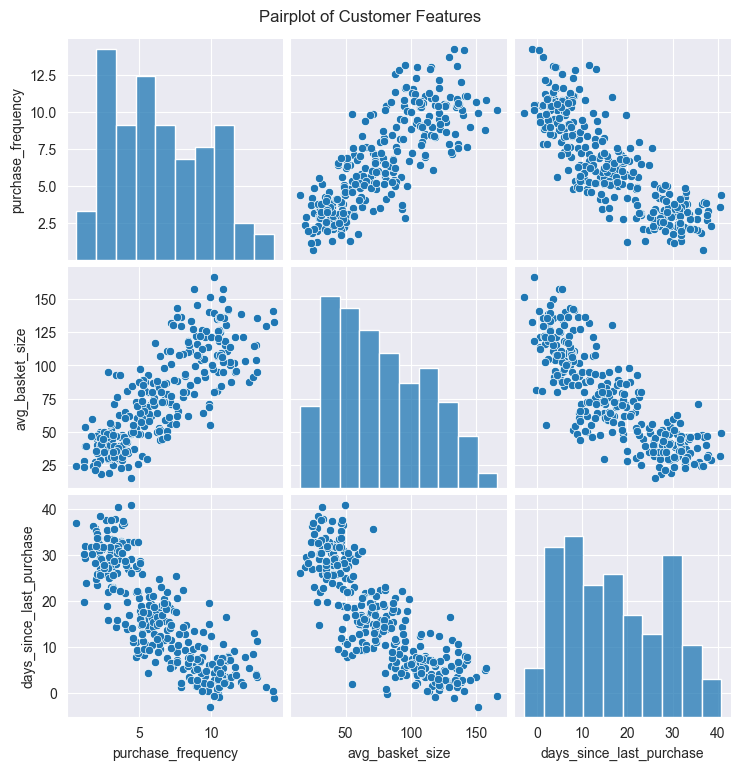

In [14]:
sns.pairplot(df)
plt.suptitle('Pairplot of Customer Features', y=1.02)
plt.show()

## Step 3: Apply K-Means Clustering
We now apply K-Means with 3 clusters and assign each customer to a group.

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
df['cluster'] = kmeans.fit_predict(df[['purchase_frequency', 'avg_basket_size', 'days_since_last_purchase']])
df

,purchase_frequency,avg_basket_size,days_since_last_purchase,cluster
0,10.993428,117.234714,6.943066,2
1,13.046060,115.316933,4.297589,2
2,13.158426,135.348695,3.591577,2
3,11.085120,110.731646,3.602811,2
4,10.483925,81.734395,-0.174753,1
...,...,...,...,...
295,8.770061,78.758923,13.562832,1
296,6.885982,86.630554,18.281929,1
297,6.760911,86.000120,19.677182,1
298,8.073238,79.730648,14.331528,1


## Step 4: Visualize Clusters in 2D
We'll use scatter plots to compare how clusters appear across feature pairs.

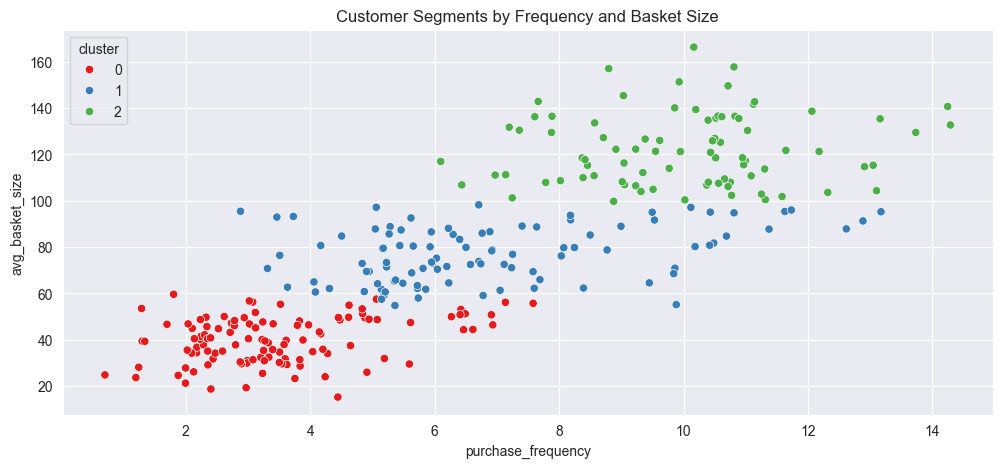

In [17]:
plt.figure(figsize=(12, 5))
sns.scatterplot(data=df, x='purchase_frequency', y='avg_basket_size', hue='cluster', palette='Set1')
plt.title('Customer Segments by Frequency and Basket Size')
plt.grid(True)
plt.show()

## Step 5: Evaluate Clustering Performance
We use silhouette score to evaluate how well-separated the clusters are. Higher silhouette score (closer to 1) indicates better-defined clusters.

### Interpreting Silhouette Score: 0.547

The **Silhouette Score** measures how well each data point fits within its assigned cluster **compared to other clusters**.

---

#### What Does the Score Represent?

The silhouette score ranges from **-1 to 1**:

| Score Range     | Interpretation                                                    |
|-----------------|--------------------------------------------------------------------|
| **~1.0**         | Clusters are **well-separated** and very distinct                 |
| **~0.5–0.7**     | Clusters are **reasonably distinct**, but not perfect             |
| **~0.0–0.3**     | Clusters are **overlapping**, not clearly separated               |
| **< 0.0**        | Many points may be in the **wrong cluster** (poor clustering)      |

---

#### What Does a Score of **0.547** Mean?

- A **silhouette score of 0.547** is considered **moderately strong**.
- This suggests that:
  - Data points are **closer to their own cluster centers** than to others.
  - There is **decent separation** between the clusters, though not perfect.
- In practical terms, the **K-Means algorithm has done a good job**, especially considering real-world data often contains noise or overlap.

---

#### How to Improve It?

If you wanted to experiment further:
- Try a different number of clusters (`n_clusters`)
- Scale/normalize the data
- Explore other clustering methods (e.g., DBSCAN, Gaussian Mixture)

---

#### Summary

A silhouette score of **0.547** indicates that the clustering results are **valid and useful**, and that the dataset likely contains **underlying structure** that K-Means has captured.


In [19]:
score = silhouette_score(df[['purchase_frequency', 'avg_basket_size', 'days_since_last_purchase']], df['cluster'])
print(f"Silhouette Score: {score:.3f}")

Silhouette Score: 0.547
